<a href="https://colab.research.google.com/github/jaiswalgaurav012002/deep_learning_project/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# New Section

In [4]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [5]:
import os
import pandas as pd

file_path = 'train.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("file has been found")
else:
    print(f"File not found: {file_path}. Please upload the dataset or correct the file path.")

file has been found


In [6]:
import pandas as pd

# Path to your CSV file
file_path = 'train.csv'  # Update with your CSV file path

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())  # Show the first few rows

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [7]:
df.head(20)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [8]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [9]:
# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

X = df['comment_text']
y = df[df.columns[2:]].values

MAX_FEATURES = 20000  # Number of words in the vocabulary
MAX_SEQUENCE_LENGTH = 1800  # Maximum length of input sequences


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense
from tensorflow.keras.metrics import Accuracy, BinaryAccuracy, CategoricalAccuracy, Precision, Recall
import matplotlib.pyplot as plt
import pandas as pd

# Build the Sequential model
model = Sequential()

# Add embedding, GRU, and Dense layers
model.add(Embedding(200001, 32))  # Adjust MAX_FEATURES
model.add(GRU(32, return_sequences=True, activation='tanh'))  # GRU layer with sequence output
model.add(GRU(32, activation='tanh'))  # Second GRU layer
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))  # Output for multi-label classification

# Compile the model with different accuracy and loss metrics
model.compile(
    loss='binary_crossentropy',  # Loss for multi-label classification
    optimizer='Adam',
    metrics=['accuracy', 'binary_accuracy', 'categorical_accuracy']  # Add different accuracy metrics
)


In [11]:

# Fit the model and capture the history
history = model.fit(
    train,
    epochs=2,  # Adjust the number of epochs
    validation_data=val,  # Include validation data
    verbose=1
)

# Plot accuracy metrics
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Metrics')
plt.legend()
plt.show()

# Plot loss metrics
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Metrics')
plt.legend()
plt.show()


NameError: name 'train' is not defined

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predictions on the test set
yhat = model.predict(test)  # Model predictions
y_true = []
for batch in test.as_numpy_iterator():
    _, y = batch  # Extract true labels
    y_true.extend(y)  # Add to the true labels list

# Convert to numpy arrays for Scikit-learn metrics
y_true = np.array(y_true).flatten()  # Flatten to 1D
yhat = np.array(yhat).flatten()  # Flatten predictions to 1D

# Calculate accuracy (binary threshold at 0.5)
accuracy = accuracy_score(y_true, yhat > 0.5)

# Calculate precision, recall, and F1 score (weighted for multi-label)
precision = precision_score(y_true, yhat > 0.5, average='weighted')  # Weighted precision
recall = recall_score(y_true, yhat > 0.5, average='weighted')  # Weighted recall
f1 = f1_score(y_true, yhat > 0.5, average='weighted')  # Weighted F1 score

# Display the calculated metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


NameError: name 'test' is not defined

In [ ]:
# Example input text
input_text = 'Shut Up you fucking bastard.'

# Vectorize the text input and ensure it has a batch dimension
vectorized_text = vectorizer(tf.constant([input_text]))  # Wrap the input in a list for batch dimension

# Make a prediction
res = model.predict(vectorized_text)

# Convert the result to binary (threshold at 0.5)
binary_res = (res > 0.5).astype(int)

print("Prediction:", binary_res)  # Display the prediction


Epoch 1/2
6981/6981 [==============================] - 801s 114ms/step - loss: 0.0641 - accuracy: 0.9771 - binary_accuracy: 0.9787 - categorical_accuracy: 0.9771 - val_loss: 0.0504 - val_accuracy: 0.9948 - val_binary_accuracy: 0.9815 - val_categorical_accuracy: 0.9948
Epoch 2/2
6981/6981 [==============================] - 700s 100ms/step - loss: 0.0488 - accuracy: 0.9913 - binary_accuracy: 0.9819 - categorical_accuracy: 0.9913 - val_loss: 0.0441 - val_accuracy: 0.9940 - val_binary_accuracy: 0.9834 - val_categorical_accuracy: 0.9940


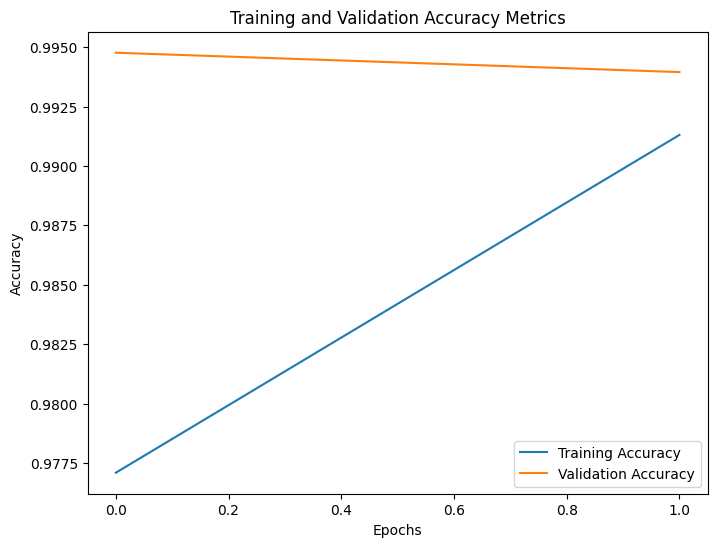

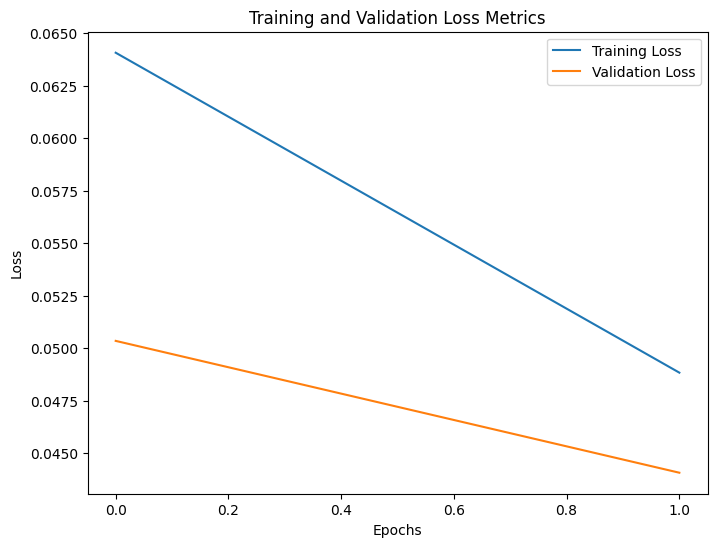

997/997 [==============================] - 43s 40ms/step
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 Score: 0.94


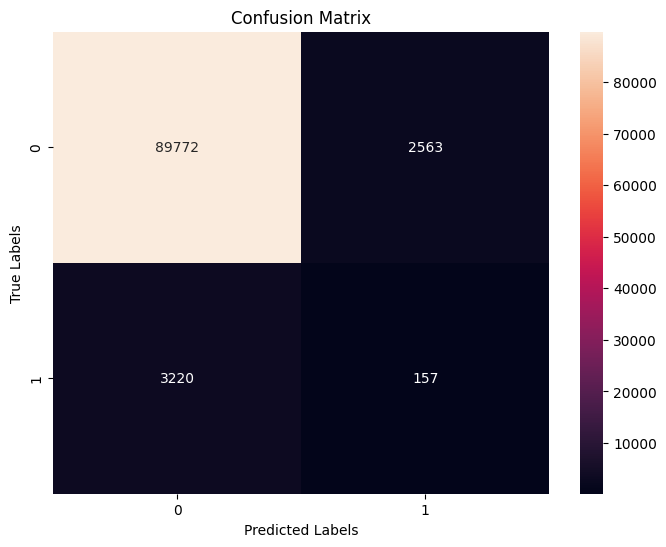

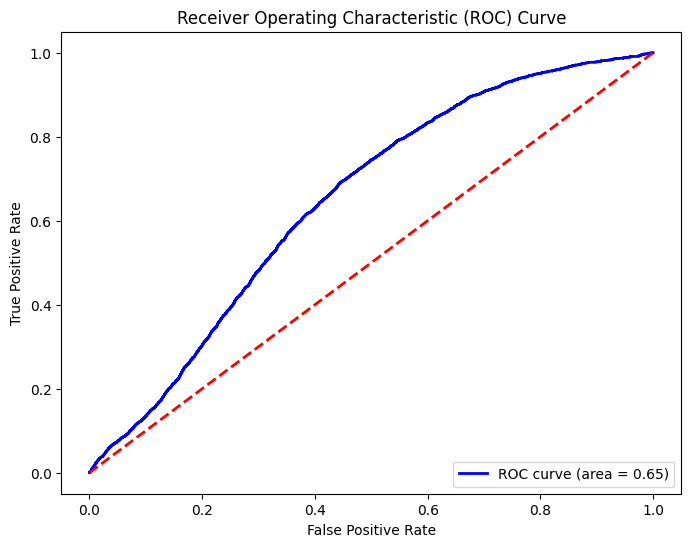

Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.23
Mean Absolute Error (MAE): 0.07


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns

# Assuming 'df' is your DataFrame and 'MAX_FEATURES' is defined

# Preprocess the dataset
X = df['comment_text']
y = df[df.columns[2:]].values

vectorizer = tf.keras.layers.TextVectorization(max_tokens=MAX_FEATURES,
                                               output_sequence_length=1800,
                                               output_mode='int')
vectorizer.adapt(X.values)
vectorized_text = vectorizer(X.values)

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache().shuffle(160000).batch(16).prefetch(8)

train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# Build the Sequential model
model = Sequential()

# Add embedding, LSTM, and Dense layers
model.add(Embedding(200001, 32))  # Adjust MAX_FEATURES
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))  # Output for multi-label classification

# Compile the model with different accuracy and loss metrics
model.compile(
    loss='binary_crossentropy',  # Loss for multi-label classification
    optimizer='Adam',
    metrics=['accuracy', 'binary_accuracy', 'categorical_accuracy']
)

# Fit the model and capture the history
history = model.fit(
    train,
    epochs=2,  # Adjust the number of epochs
    validation_data=val,  # Include validation data
    verbose=1
)

# Plot accuracy metrics
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Metrics')
plt.legend()
plt.show()

# Plot loss metrics
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Metrics')
plt.legend()
plt.show()

# Predictions on the test set
yhat = model.predict(test)
y_true = []
for batch in test.as_numpy_iterator():
    _, y = batch
    y_true.extend(y)

y_true = np.array(y_true).flatten()
yhat = np.array(yhat).flatten()

# Calculate performance metrics
accuracy = accuracy_score(y_true, yhat > 0.5)
precision = precision_score(y_true, yhat > 0.5, average='weighted')
recall = recall_score(y_true, yhat > 0.5, average='weighted')
f1 = f1_score(y_true, yhat > 0.5, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot confusion matrix
conf_mat = confusion_matrix(y_true, yhat > 0.5)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_true, yhat)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mse = mean_squared_error(y_true, yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, yhat)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


In [14]:
# Example input text for testing
input_text = 'You freaking suck! I am going to hit you.'

# Vectorize the text input and ensure it has a batch dimension
vectorized_text = vectorizer(tf.constant([input_text]))  # Wrap the input in a list for batch dimension

# Make a prediction
res = model.predict(vectorized_text)

# Convert the result to binary (threshold at 0.5)
binary_res = (res > 0.5).astype(int)

# Display the prediction
print("Prediction:", binary_res)  # Display the prediction

# This prediction will show you how the model evaluates the sentiment of the provided text


1/1 [==============================] - 2s 2s/step
Prediction: [[1 0 1 0 1 0]]


In [15]:
# Example input text for testing
input_text = 'Oh hi! good morning, good to see you!'

# Vectorize the text input and ensure it has a batch dimension
vectorized_text = vectorizer(tf.constant([input_text]))  # Wrap the input in a list for batch dimension

# Make a prediction
res = model.predict(vectorized_text)

# Convert the result to binary (threshold at 0.5)
binary_res = (res > 0.5).astype(int)

# Display the prediction
print("Prediction:", binary_res)  # Display the prediction

# This prediction will show you how the model evaluates the sentiment of the provided text

1/1 [==============================] - 0s 56ms/step
Prediction: [[0 0 0 0 0 0]]


In [16]:
# Example input text for testing
input_text = 'Shut up you fucking bastard'

# Vectorize the text input and ensure it has a batch dimension
vectorized_text = vectorizer(tf.constant([input_text]))  # Wrap the input in a list for batch dimension

# Make a prediction
res = model.predict(vectorized_text)

# Convert the result to binary (threshold at 0.5)
binary_res = (res > 0.5).astype(int)

# Display the prediction
print("Prediction:", binary_res)  # Display the prediction

# This prediction will show you how the model evaluates the sentiment of the provided text

1/1 [==============================] - 0s 87ms/step
Prediction: [[1 1 1 0 1 0]]
